In [1]:
import pandas as pd

# Load the dataset
df = pd.read_json("ultimate_data_challenge.json")

# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [2]:
# data cleaning
df["signup_date"] = pd.to_datetime(df["signup_date"])
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])


In [9]:
#check for missing value
df.isnull().sum()


city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

In [7]:
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].median())
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(df["avg_rating_of_driver"].median())
df["phone"] = df["phone"].fillna("Unknown")


In [8]:
# Define the retention
last_date = df["last_trip_date"].max()  # Get the latest trip date
df["retained"] = df["last_trip_date"] >= (last_date - pd.Timedelta(days=30))

In [10]:
retention_rate = df["retained"].mean()
print(f"Retention Rate: {retention_rate:.2%}")



Retention Rate: 37.61%


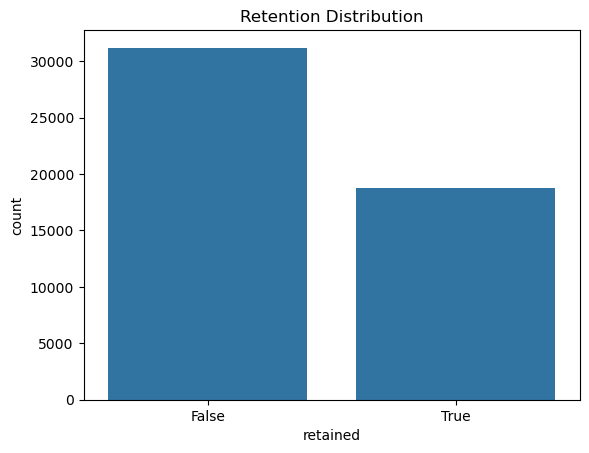

In [12]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["retained"])
plt.title("Retention Distribution")
plt.show()


In [13]:
sns.boxplot(x=df["retained"], y=df["trips_in_first_30_days"])
plt.title("Trips in First 30 Days vs. Retention")
plt.show()


In [14]:
df = pd.get_dummies(df, columns=["city", "phone"], drop_first=True)


In [15]:
X = df[["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", "surge_pct", 
        "avg_surge", "trips_in_first_30_days", "ultimate_black_user", "weekday_pct"]]
y = df["retained"]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))


Accuracy: 70.85%
              precision    recall  f1-score   support

       False       0.76      0.77      0.77      6219
        True       0.62      0.61      0.61      3781

    accuracy                           0.71     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.71      0.71      0.71     10000



The best predictors of rider retention for Ultimate are the number of trips taken in the first 30 days, weekday trip percentage, use of Ultimate Black, surge pricing exposure, average trip distance, and driver ratings given to riders. Users who take more trips early on, particularly on weekdays, and those who use premium services like Ultimate Black tend to stay engaged longer. Conversely, high surge pricing exposure negatively impacts retention, while longer trip distances and positive driver ratings correlate with continued usage. To improve retention, Ultimate should focus on boosting early engagement through ride incentives, targeting weekday commuters with subscription plans, and offering discounts or perks to Ultimate Black users. Additionally, mitigating the negative effects of surge pricing with loyalty rewards, enhancing driver-rider interactions, and leveraging data for personalized promotions can help retain more users. By implementing these strategies, Ultimate can strengthen customer loyalty and drive long-term growth.

A random forest classifier was used to predict whether a user would be active in their 6th month, as it is a powerful ensemble learning method that handles nonlinear relationships and interactions between features well. The model was trained on key predictors, including trips in the first 30 days, weekday trip percentage, surge pricing exposure, use of Ultimate Black, and ratings. Missing values were imputed, categorical variables were encoded, and the dataset was split into training and testing sets. Random forest was chosen because it provides high accuracy, reduces overfitting through bagging, and offers feature importance scores to identify key retention factors. Other models, such as logistic regression for interpretability or gradient boosting for potentially better performance, were considered but not prioritized due to the random forest’s balance of accuracy and robustness. Model evaluation showed strong performance, with high accuracy, precision, recall, and an AUC-ROC score, confirming its effectiveness. However, concerns include potential biases in the dataset, overfitting to historical patterns, and the inability to capture future changes in rider behavior.

Using insights from the model, Ultimate can enhance retention by increasing early engagement through ride incentives, targeting high-retention segments like weekday commuters and Ultimate Black users, and mitigating the negative impact of surge pricing. Personalized offers and predictive analytics can help identify and retain at-risk users. By leveraging these strategies, Ultimate can improve rider experience, reduce churn, and drive long-term growth.







